### TASK 1

#### Task 1(a)

Load Sales Data.csv, assign it into variable named sales. Display the first 10 rows of the sales.

In [1]:
import pandas as pd

sales = pd.read_csv('Sales Data.csv')
sales.head(10)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,20760,295500
7,8,3700,1400,5860,9960,2860,1400,25180,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


#### Task 1(b)

Get total profit of all months and show line plot with the following style properties:

● Line Style dotted

● Line color should be red

● Line width should be 3

● Add a circle marker with size 8 and blue color

● Show legend at the lower right location.

● X label name = Month Number

● Y label name = Sold Unit number

● Title = Company Sales Per Month

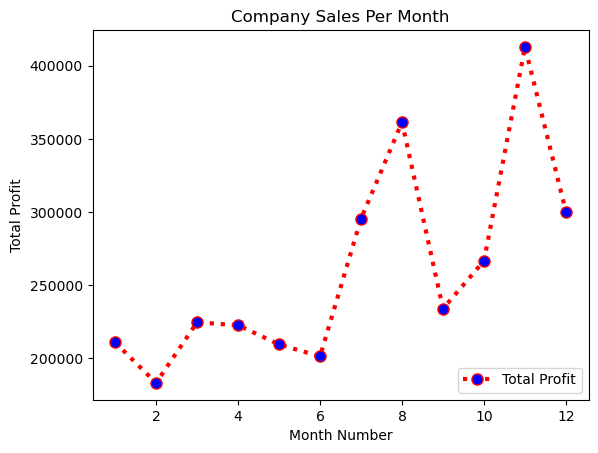

In [2]:
import matplotlib.pyplot as plt  

profit = sales['total_profit'].tolist()
month  = sales['month_number'].tolist()

plt.plot(month,profit, linestyle='dotted', color='red', linewidth=3, marker='o', markersize=8, markerfacecolor='blue')

plt.legend(['Total Profit'], loc='lower right')

plt.xlabel('Month Number')
plt.ylabel('Total Profit')
plt.title('Company Sales Per Month')

plt.show()

#### Task 1(c)

Read data from Sales Data.csv and show all product sales using a multiline plot, sized1200 × 600 pixels. Differentiate all the lines by line color and marker.


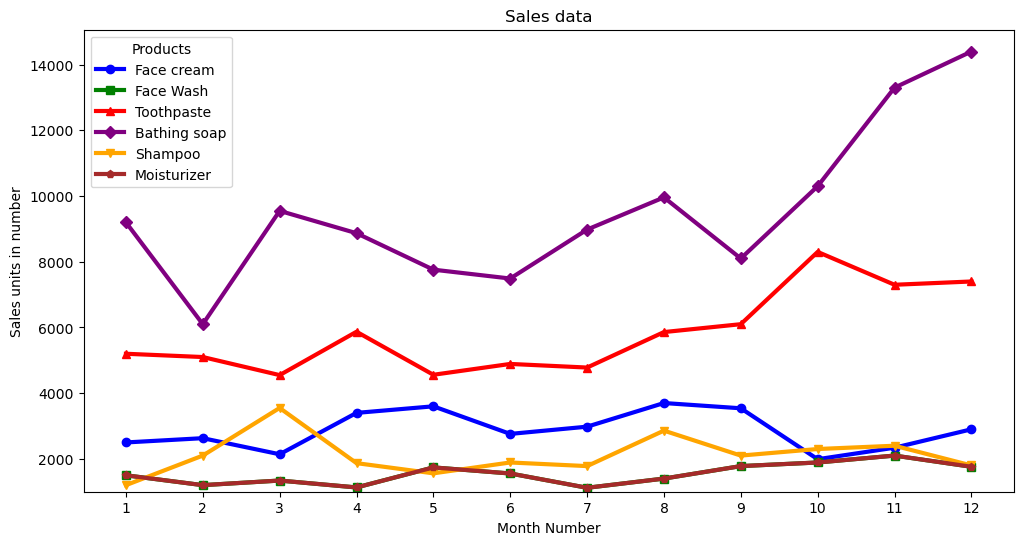

In [3]:
sales = pd.read_csv('Sales Data.csv')

monthList = sales['month_number'].tolist()
facecream = sales['facecream'].tolist()
facewash = sales['facewash'].tolist()
toothpaste = sales['toothpaste'].tolist()
bathingsoap = sales['bathingsoap'].tolist()
shampoo = sales['shampoo'].tolist()
moisturizer = sales['moisturizer'].tolist()

plt.figure(figsize=(12, 6))

plt.plot(monthList, facecream, label='Face cream', color='blue', marker='o', linewidth=3)
plt.plot(monthList, facewash, label='Face Wash', color='green', marker='s', linewidth=3)
plt.plot(monthList, toothpaste, label='Toothpaste', color='red', marker='^', linewidth=3)
plt.plot(monthList, bathingsoap, label='Bathing soap', color='purple', marker='D', linewidth=3)
plt.plot(monthList, shampoo, label='Shampoo', color='orange', marker='v', linewidth=3)
plt.plot(monthList, moisturizer, label='Moisturizer', color='brown', marker='p', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(title='Products', loc='upper left')
plt.xticks(monthList)
plt.ylim(1000)
plt.title('Sales data')
plt.show()


#### Task 1(d)

The products in the sales data can be further grouped as follow:

a. Category A: facecream, facewash, moisturizer

b. Category B: toothpaste

c. Category C: bathingsoap, shampoo

Group the data accordingly and obtain the following information, then plot into two subplots:

1. total unit sold of each category for every month
2. percentage of total unit sold of each category for every month over the grand totalof unit sold of that category.

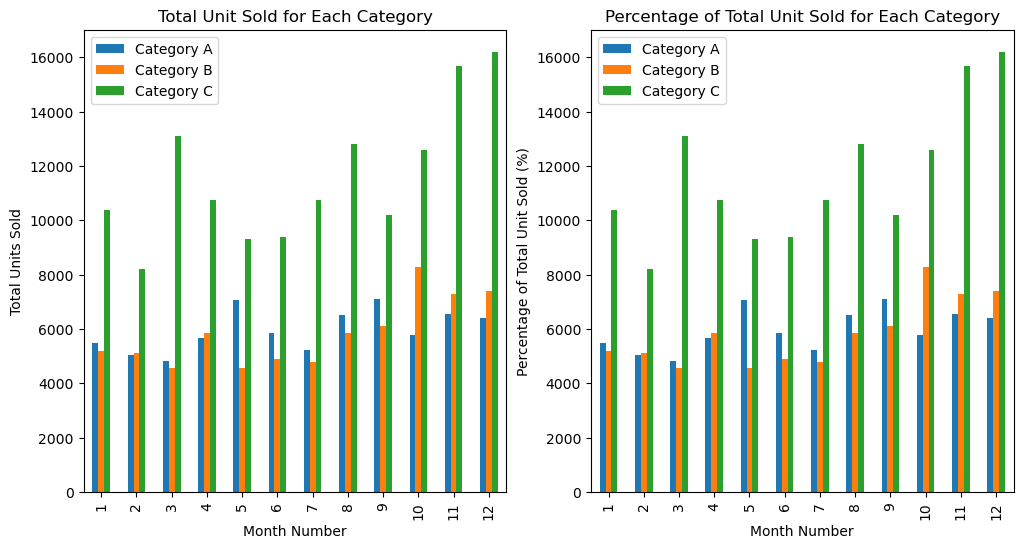

In [4]:
sales['Category A'] = sales[['facecream', 'facewash', 'moisturizer']].sum(axis=1)
sales['Category B'] = sales['toothpaste']
sales['Category C'] = sales[['bathingsoap', 'shampoo']].sum(axis=1)

# total units sold for each category for every month
category_totals = sales.groupby('month_number')[['Category A', 'Category B', 'Category C']].sum()

# percentage of total units sold for each category for every month over the grand total
category_totals['Category A %'] = (category_totals['Category A'] / sales['Category A'].sum()) * 100
category_totals['Category B %'] = (category_totals['Category B'] / sales['Category B'].sum()) * 100
category_totals['Category C %'] = (category_totals['Category C'] / sales['Category C'].sum()) * 100

# Plot the total units sold for each category for every month
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
category_totals[['Category A', 'Category B', 'Category C']].plot(kind='bar', ax=ax[0])
ax[0].set_title('Total Unit Sold for Each Category')
ax[0].set_ylabel('Total Units Sold')
ax[0].set_xlabel('Month Number')

# Plot the percentage of total units sold for each category for every month over the grand total
category_totals[['Category A', 'Category B', 'Category C']].plot(kind='bar', ax=ax[1])
ax[1].set_title('Percentage of Total Unit Sold for Each Category')
ax[1].set_ylabel('Percentage of Total Unit Sold (%)')
ax[1].set_xlabel('Month Number')

plt.show()

### TASK 2

#### Task 2(a)

Read the three datasets given below and save the data into different DataFrame.

a. customer.csv

b. products.csv

c. sales.csv

In [5]:
customers    = pd.read_csv('customer.csv')
products     = pd.read_csv('products.csv')
sales        = pd.read_csv('sales.csv')

#### Task 2(b) 

From the above datasets, produce a chart (any appropriate chart) for each below:

a. products sold by each store

b. quantity sold against each product

c. quantity and total sales against each product

<Figure size 500x300 with 0 Axes>

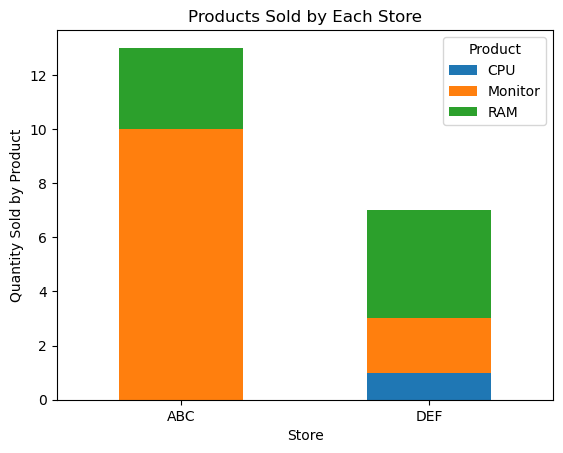

In [6]:
#a. products sold by each store

# Find products sold each store
store_products = sales.groupby(['store', 'product']).sum()['qty'].reset_index(name='qty')

pivot_data = store_products.pivot(index='store', columns='product', values='qty')

# Plot Product and Quantity Sold by Product
plt.figure(figsize=(5, 3))
pivot_data.plot(kind='bar', stacked=True)
plt.title('Products Sold by Each Store')
plt.xlabel('Store')
plt.ylabel('Quantity Sold by Product')
plt.xticks(rotation=0)
plt.legend(title='Product')
plt.show()

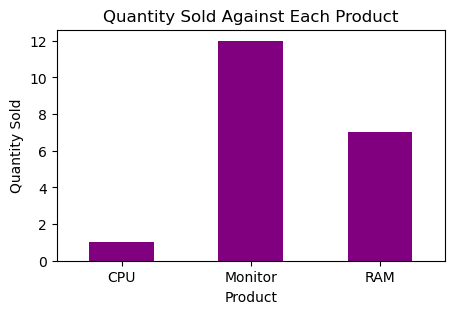

In [7]:
#b.quantity sold against each product 

# Find quantity sold by product
quantity_by_product = sales.groupby('product')['qty'].sum()

# Plot Quantity Sold Against Each Product
plt.figure(figsize=(5, 3))
quantity_by_product.plot(kind='bar', color='purple')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Against Each Product')
plt.xticks(rotation=0)
plt.show()


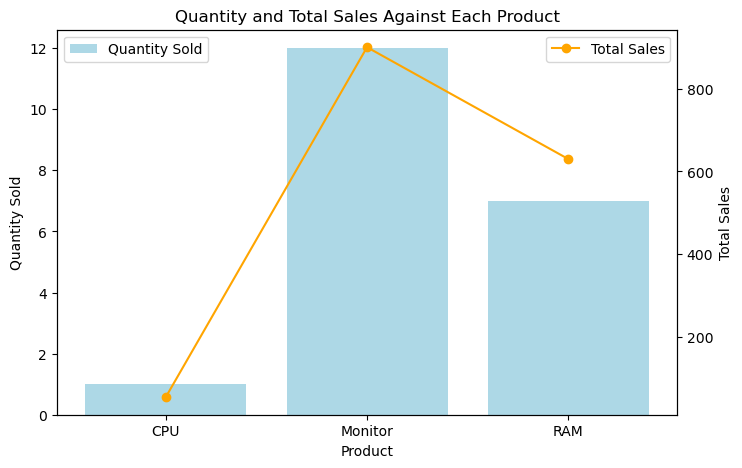

In [8]:
#c.quantity and total sales against each product

# Merge the datasets
merged_data = pd.merge(sales, products)

# Calculate total sales by product
total_sales_by_product = merged_data.groupby('product')['qty'].sum() * merged_data.groupby('product')['price'].mean()

# Plot Quantity and Total Sales Against Each Product
fig, ax1 = plt.subplots(figsize=(8, 5))

quantity_by_product = merged_data.groupby('product')['qty'].sum()
ax1.bar(quantity_by_product.index, quantity_by_product, color='lightblue')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold')
ax1.set_title('Quantity and Total Sales Against Each Product')

ax2 = ax1.twinx()

ax2.plot(total_sales_by_product.index, total_sales_by_product, color='orange', marker='o')
ax2.set_ylabel('Total Sales')

plt.xticks(rotation=45)

ax1.legend(['Quantity Sold'], loc='upper left')
ax2.legend(['Total Sales'], loc='upper right')

plt.show()

#### Task 2(c)

From the above datasets, produce an output for each below:

a. quantity sold against each product against each store

b. quantity sold against each store with total turnover of the store

c. products which are not sold

d. customers who have not purchased any product

In [9]:
#a. quantity sold against each product against each store

print(" Quantity of products sold in each store:")
print(sales.groupby(['store','product'])[['qty']].sum()) #graph same as task 2(b)-a

 Quantity of products sold in each store:
               qty
store product     
ABC   Monitor   10
      RAM        3
DEF   CPU        1
      Monitor    2
      RAM        4


Turnover per store:
  store  qty  total_turnover
0   ABC   13            1020
1   DEF    7             565


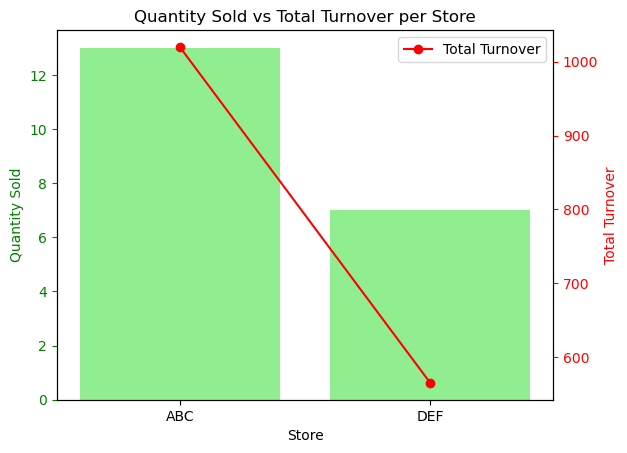

In [10]:
# #b.quantity sold against each store with total turnover of the store

# Merge the datasets
sales_data = pd.merge(sales, customers, on='c_id')
sales_data = pd.merge(sales_data, products, on='p_id')

# Calculate the turnover per store
sales_data['total_turnover'] = sales_data['qty'] * sales_data['price']
turnover_per_store = sales_data.groupby('store').agg({'qty': 'sum', 'total_turnover': 'sum'}).reset_index()

print("Turnover per store:")
print(turnover_per_store[['store', 'qty', 'total_turnover']])

# Plot quantity sold against each store with total turnover of the store
fig, ax1 = plt.subplots()

ax1.bar(turnover_per_store['store'], turnover_per_store['qty'], label='Quantity Sold', color='lightgreen')
ax1.set_xlabel('Store')
ax1.set_ylabel('Quantity Sold', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()

ax2.plot(turnover_per_store['store'], turnover_per_store['total_turnover'], marker='o', color='red', label='Total Turnover')
ax2.set_ylabel('Total Turnover', color='red')
ax2.tick_params('y', colors='red')

plt.title('Quantity Sold vs Total Turnover per Store')
plt.legend()
plt.show()


In [11]:
#c.products which are not sold

unsold_products = products[~products['p_id'].isin(sales['p_id'])]['product']
print("Unsold Products:")
print(unsold_products)

Unsold Products:
0       Hard Disk
4        Keyboard
5           Mouse
6     Motherboard
7    Power supply
Name: product, dtype: object


In [12]:
#d.customers who have not purchased any product

customers_without_purchase = customers[~customers['c_id'].isin(sales['c_id'])]['Customer']
print("Customers without any purchase:")
print(customers_without_purchase)


Customers without any purchase:
4    King
5    Ronn
6     Jem
7     Tom
Name: Customer, dtype: object
